# MACHINE LEARNING TASKS ON EDGE DEVICES

 - This Notebook is used to train Machine Learning models
 - The code is partially borrowed from [LINK](https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/)


# Import Libraries

In [1]:
#############################################################################
import os
import sys
import time
import platform
import numpy as np
import pandas as pd
import tensorflow as tf
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
#############################################################################
from utils import *
from models import *
#############################################################################

In [2]:
def get_environment_info(file_name='rasp_environment_info.txt'):
    import keras
    with open(file_name, "w") as file:
        def log_and_print(message):
            print(message)  
            file.write(message + '\n')  
        log_and_print(f'{"Python version:":<25} {sys.version}')
        log_and_print(f'{"TensorFlow version:":<25} {tf.__version__}')
        log_and_print(f'{"Keras version:":<25} {keras.__version__}')
        log_and_print(f'{"NumPy version:":<25} {np.__version__}')
        log_and_print(f'{"System architecture:":<25} {platform.architecture()}')
        log_and_print(f'{"Machine type:":<25} {platform.machine()}')
        log_and_print(f'{"Processor:":<25} {platform.processor()}')
        log_and_print(f'{"Platform:":<25} {platform.system()}, {platform.version()}')
        log_and_print(f'{"Release:":<25} {platform.release()}')
        log_and_print(f'{"Version:":<25} {platform.version()}')

        gpu_devices = tf.config.list_physical_devices('GPU')
        if gpu_devices:
            file.write("TensorFlow GPU Devices:\n")
            for device in gpu_devices:
                file.write(f"{device}\n")
        else:
            file.write("No GPU detected by TensorFlow\n")
get_environment_info(file_name='../docs//devices//santech_environment_info.txt')

Python version:           3.9.18 (main, Sep 11 2023, 13:30:38) [MSC v.1916 64 bit (AMD64)]
TensorFlow version:       2.6.0
Keras version:            2.6.0
NumPy version:            1.23.0
System architecture:      ('64bit', 'WindowsPE')
Machine type:             AMD64
Processor:                Intel64 Family 6 Model 186 Stepping 2, GenuineIntel
Platform:                 Windows, 10.0.22631
Release:                  10
Version:                  10.0.22631


## define params

In [3]:
sys.argv = [
    'train.py',                
    '--cam',          'webcam',
    '--dataset',      'cifar10',
    '--model_name',   'custom',
    '--train_model',  'True',         
    '--epochs',       '50',               
    '--lr',           '0.005',                 
    '--batch_size',   '64',            
    '--path_models',  'models',    
    '--path_results', 'results',  
    '--test_data_type','',
    '--testdevice', 'santech_laptop',
    '--verbose',      'True',
]

In [4]:
import argparse

parser = argparse.ArgumentParser()
parser.add_argument('--train_model',  type=bool,  default=True,     help='Set to True to train the model.')
parser.add_argument('--cam',          type=str,   default='webcam', help='Camera to be used.')
parser.add_argument('--dataset',      type=str,   default='cifar10',help='Camera to be used.')
parser.add_argument('--model_name',   type=str,   default='custom', help='Model to be used.')
parser.add_argument('--epochs',       type=int,   default=50,       help='Number of epochs for training.')
parser.add_argument('--lr',           type=float, default=0.005,    help='Learning rate for the optimizer.')
parser.add_argument('--batch_size',   type=int,   default=32,       help='Batch size for training.')
parser.add_argument('--path_models',  type=str,   required=True,    help='Path to tarined models.')
parser.add_argument('--path_results', type=str,   required=True,    help='Path to save/saved results.')
parser.add_argument('--test_data_type', type=str,   default='loaded',    help='Path to save/saved results.') # file
parser.add_argument('--testdevice',     type=str,   default='raspberry',   help='Path to save/saved results.')

parser.add_argument('--verbose',      type=bool,  required=True,    help='show progress.')
args = parser.parse_args()

In [5]:
dataset_manager = DatasetManager(dataset_name='cifar10',preprocess_data=True)
trainX, trainY, testX, testY = dataset_manager.load_dataset(binary2multi=True)

class_names = dataset_manager.get_class_names()

## DEFINE/LOAD MODEL

In [6]:
# model = ms.define_model(args)
models = Models(args)
model = models.get_model()
model = models.compile_model(args,model)

c:\Users\XN2\miniconda3\envs\tfgpu\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


## Model Inspection

In [7]:
#### PRE TRAINING INSPECTION
inspector= Inspection(model)
inspector.model_stats()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

### Train / Load Model

In [8]:
args.train_model = False
# args.train_model = True

In [9]:
csv_filepath = f'{args.path_models}/training_history_{args.epochs}_{args.lr}.csv'
model_filepath   = f'{args.path_models}/Resnet_pretrained_{args.epochs}_{args.lr}.keras'
if args.train_model:
    print('-'*100)
    print(f'training started for : | {args.epochs:<8} epochs &  learn_rate: {args.lr:<15} | & batch_size: {args.batch_size:<15} |')
    print('-'*100)
    history = model.fit(trainX, trainY, epochs=args.epochs, batch_size=args.batch_size, 
                    validation_data=(testX, testY), verbose=1)
    history_df = pd.DataFrame(history.history)
    history_df.to_csv(csv_filepath, index=False)
    model.save(model_filepath)
    print('-'*100)
    print(f'model trained and saved for :{args.epochs} epochs & learn_rate: {args.lr}')
    print('-'*100)
else:
    if os.path.exists(model_filepath):
        model = tf.keras.models.load_model(model_filepath)
        history_df = pd.read_csv(csv_filepath)
        print('-'*100)
        print(f'model loaded for :{args.epochs} epochs & learn_rate: {args.lr}')
        print('-'*100)
    else:
        print('-'*100)
        print(f'model not found :{args.epochs} epochs & learn_rate: {args.lr} ')
        print('-'*100)
        history_df = None

----------------------------------------------------------------------------------------------------
model loaded for :50 epochs & learn_rate: 0.005
----------------------------------------------------------------------------------------------------


In [10]:
#### POST TRAINING INSPECTION
inspector= Inspection(model)
inspector.model_stats(print_summary=False)

Trainable Parameters           550570
Non-Trainable Parameters       0.0
Total Parameters:              550570.0
Model Size (MB)                2.10
Approximate FLOPs              38.90 MFLOPs


# Test Full Model

In [11]:
model_type = 'full_model'

_, acc = model.evaluate(testX, testY, verbose=args.verbose,  batch_size=8)

print('> %.3f' % (acc * 100.0))

1250/1250 [==============================] - 7s 1ms/step - loss: 0.6109 - accuracy: 0.8238
> 82.380


In [12]:
trainX, trainY, testX, testY = dataset_manager.load_dataset(binary2multi=False)

In [13]:
y_pred = model.predict(testX,verbose=args.verbose,  batch_size=8)
y_pred = np.argmax(y_pred, axis = 1).astype('uint8')

1250/1250 [==============================] - 2s 953us/step


In [14]:
evaluation = Evaluation(y_true=testY,y_pred=y_pred,args=args)

In [15]:
results = evaluation.evaluate_model()

for perf_measures,perf_values in results.items():
    print(f'{perf_measures:<20} : {perf_values:<10.7}')

Accuracy             : 0.8238    
Balanced_Accuracy    : 0.8238    
Precision            : 0.8256042 
Recall               : 0.8238    
F1                   : 0.823831  
F_Beta               : 0.8246705 
cohen_kappa          : 0.8042222 
MCC                  : 0.8044089 


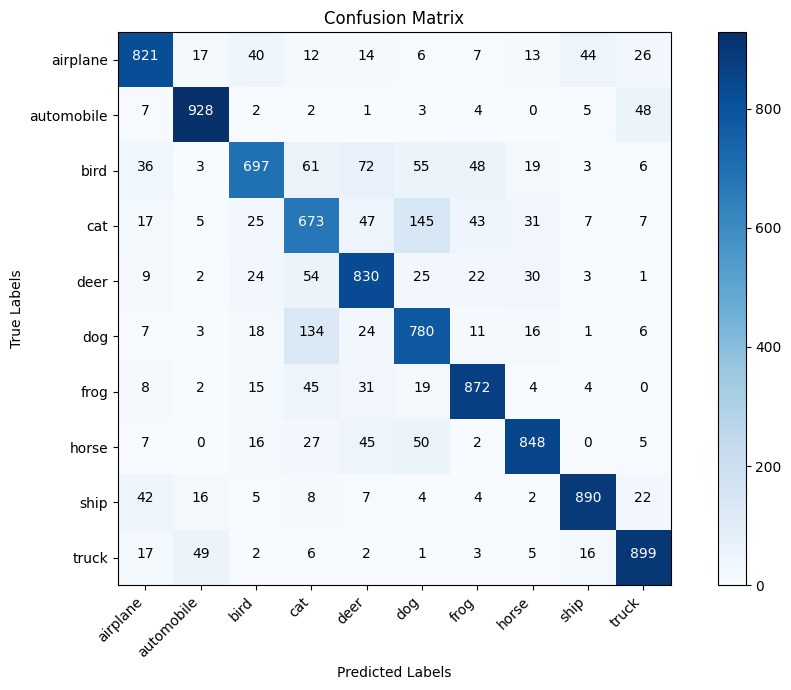

In [16]:
evaluation.plot_confusion_matrix(model_type=model_type)

## Convert Model to Tensorflow Lite and Save

In [17]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
tfl_model_path = f"{args.path_models}/converted_model_{args.epochs}_{args.lr}.tflite"
open(tfl_model_path, "wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\XN2\AppData\Local\Temp\tmpim5em_xm\assets


2207544

# TEST USING QUANTIZED MODEL

In [18]:
top_preds = 3
test_verbose = False
model_type = 'tfl_model'

print('Images INFO:', type(testX[0]), testX[0].dtype)

Images INFO: <class 'numpy.ndarray'> float32


In [19]:
# Load TFLite model
interpreter = tf.lite.Interpreter(model_path=tfl_model_path)
interpreter.allocate_tensors()
input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

In [20]:
data_csv = []
predictions = []
predY_tfl = []
for idd,(img,lbl) in enumerate(zip(tqdm(testX),testY)):
	epoch_start_time = time.time()
	if len(lbl.shape)!=0:
		lbl = lbl[0]
	data = {}

	processed_img  = np.expand_dims(img, axis=0)#.astype('float32')  # float32' 
	
	interpreter.set_tensor(input_index, processed_img)
	interpreter.invoke()

	top_k_values, top_k_indices = tf.nn.top_k(interpreter.get_tensor(output_index), top_preds)
	
	topk = top_k_indices[0].numpy()
	topv = top_k_values[0].numpy()

	prediction = np.argmax(interpreter.get_tensor(output_index))
	# print(lbl,prediction, lbl.shape, prediction.shape)
	if test_verbose:
		if class_names[lbl] == class_names[prediction]:
			print(f'CORRECT: {idd}/{testX.shape[0]} : {class_names[lbl]:<20}, - ,{class_names[prediction]:<20} - {topv}')
		else:
			print(f'WRONG: {idd}/{testX.shape[0]} : {class_names[lbl]:<20}, - ,{class_names[prediction]:<20} - {topv}')

	prediction_cifar = {class_name : 0.0 for class_name in class_names}
	prediction_val = []
	
	for tk,tv,rr in zip(topk,topv,range(0,top_preds,1)):
		prediction_val.append(f'{class_names[topk[rr]]}:{topv[rr]*100:0.2f}')
	predictions.append(prediction_val)
	epoch_end_time = time.time()
	elapsed_time = epoch_end_time - epoch_start_time
	elapsed_time_str = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
	predY_tfl.append(prediction)
	data = {'id':idd,
		'test_lbl':lbl,
		'prediction_lbl':prediction,
		'true_class':class_names[lbl],
		'prediction_class':class_names[prediction],
		'probability':topv[0]*100,
		'prediction_time':elapsed_time_str,
		'testdevice':'santech',
		'model_type':'TFL',
		}
	data_csv.append(data)
df = pd.DataFrame(data_csv)

df.to_csv(f'{args.path_results}/{args.dataset}_{args.model_name}_test_results_{args.testdevice}.csv', index = False)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [21]:
df.head(5)

,id,test_lbl,prediction_lbl,true_class,prediction_class,probability,prediction_time,testdevice,model_type
0,0,3,3,cat,cat,99.194568,00:00:00,santech,TFL
1,1,8,8,ship,ship,94.733810,00:00:00,santech,TFL
2,2,8,8,ship,ship,99.269718,00:00:00,santech,TFL
3,3,0,0,airplane,airplane,99.904662,00:00:00,santech,TFL
4,4,6,6,frog,frog,99.999523,00:00:00,santech,TFL


In [22]:
predY_tfl = np.array(predY_tfl)
print(testY.shape, predY_tfl.shape)

(10000,) (10000,)


In [23]:
evaluation_tfl = Evaluation(y_true=testY,y_pred=predY_tfl, args=args)

In [24]:
results_tfl = evaluation_tfl.evaluate_model()

for perf_measures,perf_values in results_tfl.items():
    print(f'{perf_measures:<20} : {perf_values:<10.7}')

Accuracy             : 0.8237    
Balanced_Accuracy    : 0.8237    
Precision            : 0.8255259 
Recall               : 0.8237    
F1                   : 0.8237418 
F_Beta               : 0.8245878 
cohen_kappa          : 0.8041111 
MCC                  : 0.8042978 


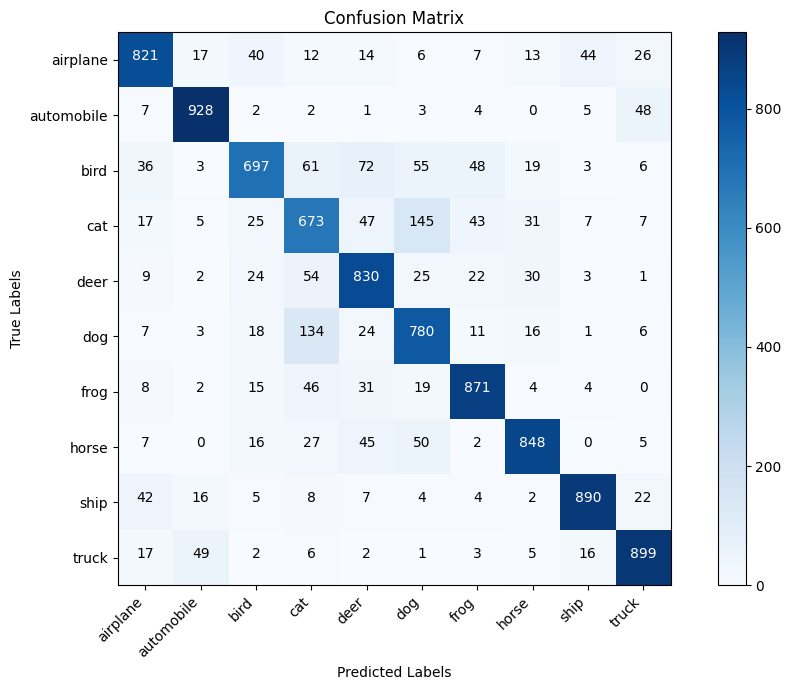

In [25]:
evaluation_tfl.plot_confusion_matrix(model_type=model_type)

# Load Raspberry Results and Evalauate


### COPY Data from Raspberry Pi

In [26]:
# DATA COPY COMMANDS
'''
scp -r pi@192.168.1.21:/home/pi/raspi_projects/AI_on_Edge_Devices\docs\devices E:\PHD\datacloud_data\repos\AI_on_Edge_Devices\docs\devices
scp pi@192.168.1.21:/home/pi/raspi_projects/test_acc.py E:\PHD\datacloud_data\repos\AI_on_Edge_Devices\codes
scp pi@192.168.1.21:/home/pi/raspi_projects/predY_tfl_raspberry.npy E:\PHD\datacloud_data\repos\AI_on_Edge_Devices\codes\results
scp pi@192.168.1.21:/home/pi/raspi_projects/AI_on_Edge_Devices/codes/results/cifar10_custom_test_results_raspberry.csv E:\PHD\datacloud_data\repos\AI_on_Edge_Devices\codes\results
'''

'\nscp -r pi@192.168.1.21:/home/pi/raspi_projects/AI_on_Edge_Devices\\docs\\devices E:\\PHD\\datacloud_data\repos\\AI_on_Edge_Devices\\docs\\devices\nscp pi@192.168.1.21:/home/pi/raspi_projects/test_acc.py E:\\PHD\\datacloud_data\repos\\AI_on_Edge_Devices\\codes\nscp pi@192.168.1.21:/home/pi/raspi_projects/predY_tfl_raspberry.npy E:\\PHD\\datacloud_data\repos\\AI_on_Edge_Devices\\codes\results\nscp pi@192.168.1.21:/home/pi/raspi_projects/AI_on_Edge_Devices/codes/results/cifar10_custom_test_results_raspberry.csv E:\\PHD\\datacloud_data\repos\\AI_on_Edge_Devices\\codes\results\n'

In [27]:
model_type = 'tfl_model_raspi'
args.testdevice = 'raspi'

In [28]:
data_tfl_raspberry = np.load(f'results//predY_tfl_raspberry.npy')

print(testY.shape, data_tfl_raspberry.shape)

(10000,) (20000,)


In [29]:
testY = data_tfl_raspberry[:10000]
predY_tfl_raspberry = data_tfl_raspberry[10000:]

print(testY.shape, predY_tfl_raspberry.shape)

(10000,) (10000,)


## Load CSV FILE

In [30]:
df_raspi = pd.read_csv(f'results//cifar10_custom_test_results_raspberry.csv')
df_raspi.head()

,id,test_lbl,prediction_lbl,true_class,prediction_class,probability,prediction_time,testdevice,model_type
0,0,3,3,cat,cat,86.140049,0.03s,raspberry,custom
1,1,8,1,ship,automobile,96.227664,0.02s,raspberry,custom
2,2,8,8,ship,ship,96.936733,0.02s,raspberry,custom
3,3,0,0,airplane,airplane,96.028841,0.01s,raspberry,custom
4,4,6,6,frog,frog,93.903857,0.01s,raspberry,custom


In [31]:
evaluation_tfl_raspi = Evaluation(y_true=testY,y_pred=predY_tfl_raspberry, args=args)

results_tfl_raspi = evaluation_tfl_raspi.evaluate_model()

for perf_measures,perf_values in results_tfl_raspi.items():
    print(f'{perf_measures:<20} : {perf_values:<10.7}')

Accuracy             : 0.7634    
Balanced_Accuracy    : 0.7691612 
Precision            : 0.7634    
Recall               : 0.7691612 
F1                   : 0.7634393 
F_Beta               : 0.7627901 
cohen_kappa          : 0.7371111 
MCC                  : 0.7376948 


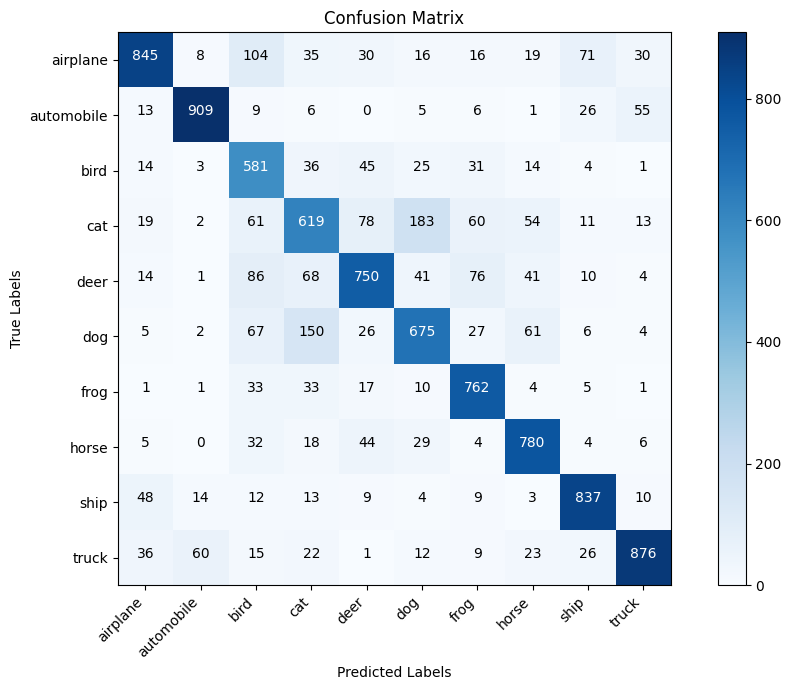

In [32]:
evaluation_tfl_raspi.plot_confusion_matrix(model_type=model_type)